# 결측치 처리 : 결측치 확인

In [1]:
import numpy as np
arr = np.array([1, 2, np.nan, 4, 5])
mask = np.isnan(arr)
print(mask)

[False False  True False False]


# 결측치 삭제 

In [2]:
data = np.array([1, 2, np.nan, 4, 5, np.nan])
cleaned_data = data[~np.isnan(data)]
print(cleaned_data)

[1. 2. 4. 5.]


# 결측치 합계

In [3]:
arr2d = np.array([[1, 2, np.nan], [4, np.nan, 6]])
print(np.isnan(arr2d)) 
print(np.sum(np.isnan(arr2d))) # Total NaNs: 2 [2]
print(np.sum(np.isnan(arr2d), axis=0)) # Column-wise NaNs: [0 1 1][2]
print(np.sum(np.isnan(arr2d), axis=1)) # Row-wise NaNs: [1 1][2]

[[False False  True]
 [False  True False]]
2
[0 1 1]
[1 1]


# pandas 활용

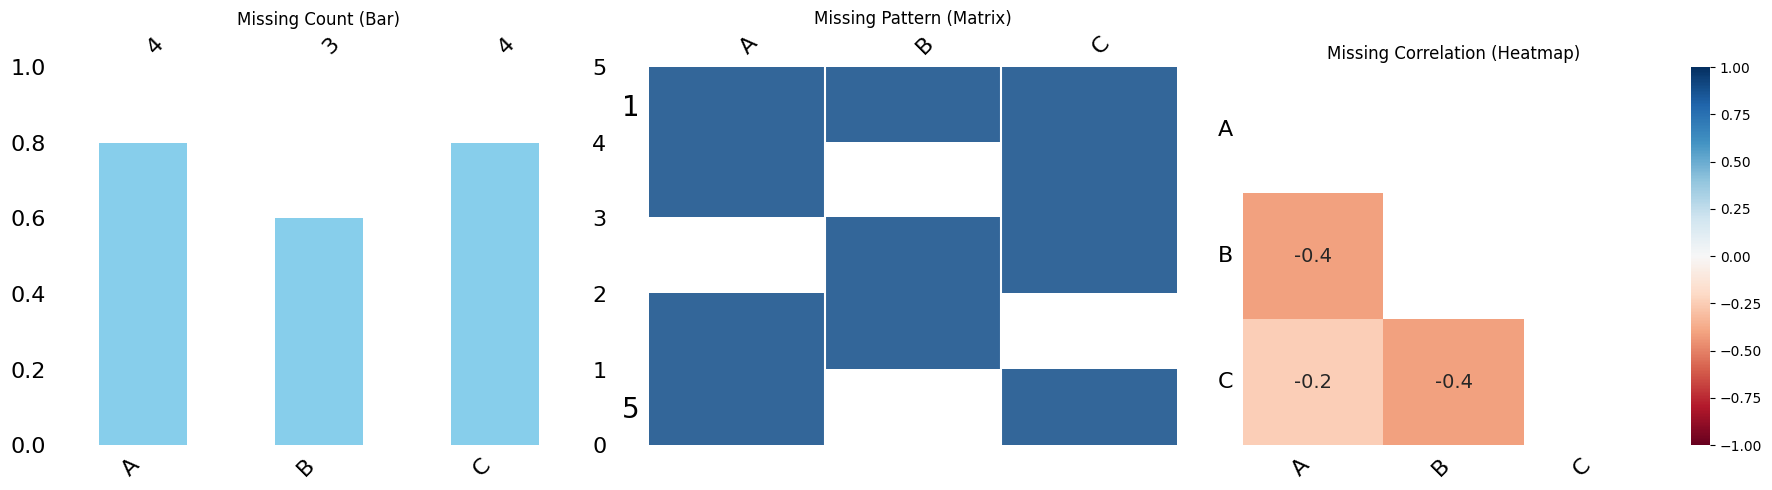

In [4]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5],
    'B': [10, np.nan, 30, 40, np.nan],
    'C': ['x', 'y', 'z', None, 'w']
})

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

msno.bar(df, ax=axes[0], color='skyblue')
axes[0].set_title("Missing Count (Bar)")

msno.matrix(df, ax=axes[1], color=(0.2, 0.4, 0.6), sparkline=False)
axes[1].set_title("Missing Pattern (Matrix)")

msno.heatmap(df, ax=axes[2])
axes[2].set_title("Missing Correlation (Heatmap)")

plt.tight_layout()
plt.show()

# 결측치 처리 주요 전략 비교 - 삭제

In [5]:
import numpy as np

# 결측치 포함 데이터
data = np.array([
    [1,  2,  3],
    [4,  np.nan,  6],
    [7,  8,  np.nan],
    [10, 11, 12]
], dtype=float)

# NaN이 있는 행 제거
cleaned_data_rows = data[~np.isnan(data).any(axis=1)]
print(cleaned_data_rows)

[[ 1.  2.  3.]
 [10. 11. 12.]]


In [6]:
data = np.array([[1, 2, np.nan], [4, np.nan, 6], ])
cleaned_data_cols = data[:, ~np.isnan(data).any(axis=0)]
print(cleaned_data_cols)

[[1.]
 [4.]]


In [7]:
import numpy as np

# 예시 데이터 (NaN 포함)
data = np.array([
    [1,   np.nan, 3],
    [np.nan, np.nan, 6],
    [7,   8,      np.nan],
    [10,  11,     12]
], dtype=float)

# 행별 결측치 개수
nan_counts = np.isnan(data).sum(axis=1)

# np.where를 이용해 결측치 개수가 2개 이상(50% 이상)인 행의 인덱스를 찾음
rows_to_delete = np.where(nan_counts >= data.shape[1] / 2)[0]
print("삭제 대상 행 인덱스:", rows_to_delete)

# 해당 행 삭제
cleaned_data = np.delete(data, rows_to_delete, axis=0)

print("원본 데이터:\n", data)
print("\n삭제 후 데이터:\n", cleaned_data)


삭제 대상 행 인덱스: [1]
원본 데이터:
 [[ 1. nan  3.]
 [nan nan  6.]
 [ 7.  8. nan]
 [10. 11. 12.]]

삭제 후 데이터:
 [[ 1. nan  3.]
 [ 7.  8. nan]
 [10. 11. 12.]]


# 대치법

## 평균대치

In [8]:
import numpy as np
data = np.array([[1, 2, np.nan], [4, np.nan, 6], ])
col_mean = np.nanmean(data, axis=0) 
nan_indices_row, nan_indices_col = np.where(np.isnan(data))
data[nan_indices_row, nan_indices_col] = col_mean[nan_indices_col]
print(data)

[[1. 2. 6.]
 [4. 2. 6.]]


## 그 외 대치법
- 중앙값 대치, 최빈값 대치, 특정 값 대치, np.where를 활용한 조건부 대치

In [9]:
import numpy as np
import pandas as pd

# 예시 데이터 생성
data_numeric = np.array([1, 2, np.nan, 4, 100, np.nan])   # 숫자형 데이터 (이상치 포함)
data_categorical = np.array(['A', np.nan, 'B', 'A', np.nan, 'B'], dtype=object)  # 범주형 데이터

print("원본 숫자형 데이터:", data_numeric)
print("원본 범주형 데이터:", data_categorical)

# 1. 중앙값 대치 (np.nanmedian 사용)
median_val = np.nanmedian(data_numeric)  # NaN 무시하고 중앙값 계산
numeric_median_filled = np.where(np.isnan(data_numeric), median_val, data_numeric)
print("\n[중앙값 대치] NaN → 중앙값", median_val, "로 대치")
print(numeric_median_filled)

# 2. 최빈값 대치 (범주형 데이터에 적용)
mode_val = pd.Series(data_categorical).mode().iloc[0]  # Pandas로 최빈값 계산
categorical_mode_filled = np.where(pd.isnull(data_categorical), mode_val, data_categorical)
print("\n[최빈값 대치] NaN → 최빈값", mode_val, "로 대치")
print(categorical_mode_filled)

# 3. 특정 값 대치 (예: NaN을 0으로)
numeric_zero_filled = np.nan_to_num(data_numeric, nan=0)  # NaN → 0
print("\n[특정 값 대치] NaN → 0")
print(numeric_zero_filled)

# 4. np.where를 이용한 조건부 대치
# 예: 값이 50 이상이거나 NaN이면 999로 대치
condition = (data_numeric >= 50) | np.isnan(data_numeric)
numeric_conditional_filled = np.where(condition, 999, data_numeric)
print("\n[조건부 대치] 50 이상 또는 NaN → 999")
print(numeric_conditional_filled)

원본 숫자형 데이터: [  1.   2.  nan   4. 100.  nan]
원본 범주형 데이터: ['A' nan 'B' 'A' nan 'B']

[중앙값 대치] NaN → 중앙값 3.0 로 대치
[  1.   2.   3.   4. 100.   3.]

[최빈값 대치] NaN → 최빈값 A 로 대치
['A' 'A' 'B' 'A' 'A' 'B']

[특정 값 대치] NaN → 0
[  1.   2.   0.   4. 100.   0.]

[조건부 대치] 50 이상 또는 NaN → 999
[  1.   2. 999.   4. 999. 999.]


# 고급 대치법 

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

# ===== 1. 선형 보간법 예시 =====
n = 100
rng = np.random.default_rng(42)
dates = pd.date_range("2024-01-01", periods=n, freq="D")
signal = np.linspace(10, 20, n) + rng.normal(0, 0.4, n)
ts = pd.Series(signal, index=dates, name="value")

nan_idx = rng.choice(n, size=15, replace=False)
ts_with_nans = ts.copy()
ts_with_nans.iloc[nan_idx] = np.nan
ts_interpolated = ts_with_nans.interpolate(method="time", limit_direction="both")

# ===== 2. KNN & MICE 예시 =====
m = 200
X = np.empty((m, 3), dtype=float)
X[:, 0] = rng.normal(50, 10, m)
X[:, 1] = 0.5 * X[:, 0] + rng.normal(0, 3, m)
X[:, 2] = 2.0 * X[:, 0] - 0.7 * X[:, 1] + rng.normal(0, 5, m)

mask = rng.random(X.shape) < 0.12
X_with_nans = X.copy()
X_with_nans[mask] = np.nan

knn = KNNImputer(n_neighbors=5, weights="distance")
X_knn = knn.fit_transform(X_with_nans)

mice = IterativeImputer(random_state=0, max_iter=20)
X_mice = mice.fit_transform(X_with_nans)

# ===== 3. 3x2 시각화 =====
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# (1,1)
axes[0, 0].plot(ts_with_nans.index, ts_with_nans.values, marker="o")
axes[0, 0].set_title("Time Series with NaNs")

# (1,2)
axes[0, 1].plot(ts_interpolated.index, ts_interpolated.values, marker="o")
axes[0, 1].set_title("Linear Interpolation")

# (2,1)
axes[1, 0].plot(X_with_nans[:, 0], "o", label="Original (NaNs)")
axes[1, 0].plot(X_knn[:, 0], "-", label="KNN")
axes[1, 0].plot(X_mice[:, 0], "-", label="MICE")
axes[1, 0].set_title("Feature 0 Imputation")
axes[1, 0].legend()

# (2,2)
axes[1, 1].plot(X_with_nans[:, 1], "o", label="Original (NaNs)")
axes[1, 1].plot(X_knn[:, 1], "-", label="KNN")
axes[1, 1].plot(X_mice[:, 1], "-", label="MICE")
axes[1, 1].set_title("Feature 1 Imputation")
axes[1, 1].legend()

# (3,1)
axes[2, 0].plot(X_with_nans[:, 2], "o", label="Original (NaNs)")
axes[2, 0].plot(X_knn[:, 2], "-", label="KNN")
axes[2, 0].plot(X_mice[:, 2], "-", label="MICE")
axes[2, 0].set_title("Feature 2 Imputation")
axes[2, 0].legend()

# (3,2)
axes[2, 1].plot(ts_with_nans.index, ts_with_nans.values, "o-", label="Original (NaNs)")
axes[2, 1].plot(ts_interpolated.index, ts_interpolated.values, ".-", label="Interpolated")
axes[2, 1].set_title("Overlay: Original vs Interpolated")
axes[2, 1].legend()

plt.tight_layout()

# JPG 파일로 저장
plt.savefig("imputation_visualization.jpg", format="jpg", dpi=300)
plt.close()

# 코드 성능 비교 

In [11]:
import numpy as np, time

rng = np.random.default_rng(42)
n = 1_000_000
base = rng.random(n).astype(np.float64)
missing_idx = rng.choice(n, size=int(0.1 * n), replace=False)

arr_loop = base.copy()
arr_loop[missing_idx] = np.nan
arr_np = base.copy()
arr_np[missing_idx] = np.nan

# 1) For-loop 평균 대치
t0 = time.perf_counter()
mean_val_loop = 0.0
count = 0
for x in arr_loop:
    if not np.isnan(x):
        mean_val_loop += x
        count += 1
if count > 0:
    mean_val_loop /= count
for i in range(len(arr_loop)):
    if np.isnan(arr_loop[i]):
        arr_loop[i] = mean_val_loop
t1 = time.perf_counter()
loop_time = t1 - t0

# 2) NumPy vectorized 평균 대치
t2 = time.perf_counter()
mean_val_np = np.nanmean(arr_np)
arr_np[np.isnan(arr_np)] = mean_val_np
t3 = time.perf_counter()
np_time = t3 - t2

# Compute ratio (slower / faster)
slower = max(loop_time, np_time)
faster = min(loop_time, np_time)
ratio = slower / faster if faster > 0 else float('inf')

print(f"For-loop 시간: {loop_time:.6f} 초")
print(f"NumPy 시간  : {np_time:.6f} 초")
print(f"느린/빠른 속도비: 약 {ratio:.2f} 배")

For-loop 시간: 0.891063 초
NumPy 시간  : 0.006995 초
느린/빠른 속도비: 약 127.38 배
